In [1]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split




In [2]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,1:n-7]
y_train = X[:,65:71]


#Test data 
x_test = X1[:,1:n-7]
y_test = X1[:,65:71]

y_class_test=X1[:,64]


In [3]:
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(np.shape(y_train))
print(m)
print(n)



(624, 63)
(240, 63)
(240, 6)
(624, 6)
624
71


In [4]:
print(y_test)
print(y_train)
print(x_test)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[1.74609490e-02 1.74181029e-01 5.76437035e-01 ... 1.00034921e+00
  1.06315186e+00 4.91000000e-05]
 [1.42657886e-01 5.02927964e-01 8.66439440e-01 ... 1.02667709e+00
  1.05623771e+00 2.21876300e-03]
 [1.46212899e-01 1.00000000e+00 8.68210313e-01 ... 8.21476892e-01
  9.21601470e-01 2.04272130e-02]
 ...
 [1.11397883e-01 1.49416435e-01 5.00590275e-01 ... 9.97035431e-01
  8.89674308e-01 1.30479300e-03]
 [1.33952540e-01 2.32089270e-01 6.67502942e-01 ... 9.68489996e-01
  9.01918230e-01 4.40744100e-02]
 [1.33952540e-01 2.32089270e-01 6.67502942e-01 ... 9.68489996e-01
  9.01918230e-01 4.40744100e-02]]


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np



In [97]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(x_train)

624


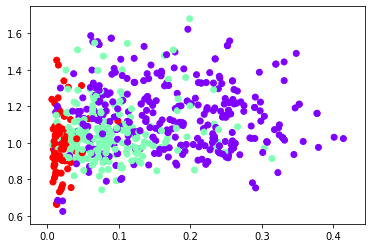

In [98]:
from mpl_toolkits.mplot3d import Axes3D
print(len(clusters))
plt.scatter(x_train[:,0],x_train[:,20], c=cluster.labels_, cmap='rainbow')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x_train[:,1], x_train[:,2], x_train[:,3], c=cluster.labels_, cmap='rainbow')

In [99]:
print(clusters)

[2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 1 0 1 1 0 0 2 0
 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0
 1 1 0 2 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1
 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 1 1 1 0 2 1 1 1 0 0 2 0 0 1 1
 0 2 0 1 1 0 0 0 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 2 0 2 0 1 2 0 0 2 0 0 1 1 0
 2 0 1 1 0 0 0 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 1
 0 1 1 0 0 2 0 0 1 1 0 1 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 0 0
 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 1 1 1 1 1 0 1
 1 1 1 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1
 0 0 2 0 0 1 1 0 0 0 0 1 1 0 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0
 0 2 0 0 1 1 0 0 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 2 0 0 1 1 0 2 0 1 1 0 0 2 0 0 1 1 0 2 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2
 0 0 1 1 0 2 0 1 1 1 0 2 

In [446]:
from operator import itemgetter, attrgetter
def KNN_Class_Prediction(x_train, x_test, y_train, N_classes, k):
    Pred=[]
    DD=[]
    P=[]
    xl,xh=np.shape(x_train)
    xxl,xxh=np.shape(x_test)
    
    for h in range (0,xxh):
        DD=[]
        for i in range(0,xh-1):
            D=0;
            for j in range(0,xl-1):
                D=D+(np.square(x_test[0,i]-x_train[j,i]))
            DD.append([])
            DD[i]=[i,np.sqrt(D)]
        DD=sorted(DD, key=itemgetter(1))
        DD=np.array(DD)
        DD=DD.astype(int)
        P.append([])
        P[h]=np.sum(y_train[DD[0:k-1,0],3])/k
    
    return P

In [448]:
y_pred=KNN_Class_Prediction(x_train,x_test,y_train,6,50)

In [449]:
print(y_pred)
print(len(y_pred))
print(y_test[200])
print(y_train[[2,8,14,18,24,30,36,42,48,54],2])

[0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]
63
[0. 0. 1. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
g = 6
y_pred = []
y_prob = [] 

for i in range(6):
    y_pred.append([])
    y_prob.append([]) 
    n = KNeighborsClassifier(n_neighbors = 104, p=2 )
    y_pred[i] = n.fit(x_train, y_train[:,i])
    y_prob[i]  = n.predict_proba(x_test)

print(np.shape(y_prob))  
        

(6, 240, 2)


In [7]:

y_class_test=y_class_test.astype(int)
print(y_class_test)

[1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1
 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2
 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3
 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4
 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5
 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6
 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]


In [8]:
print(y_prob)

[array([[0.34615385, 0.65384615],
       [0.88461538, 0.11538462],
       [0.99038462, 0.00961538],
       [1.        , 0.        ],
       [0.97115385, 0.02884615],
       [1.        , 0.        ],
       [0.34615385, 0.65384615],
       [0.79807692, 0.20192308],
       [1.        , 0.        ],
       [0.97115385, 0.02884615],
       [0.99038462, 0.00961538],
       [0.99038462, 0.00961538],
       [0.71153846, 0.28846154],
       [0.98076923, 0.01923077],
       [0.99038462, 0.00961538],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86538462, 0.13461538],
       [0.99038462, 0.00961538],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93269231, 0.06730769],
       [0.93269231, 0.06730769],
       [0.99038462, 0.00961538],
       [1.        , 0.        ],
       [0.88461538, 0.11538462],
       [0.97115385, 0.02884615],
       [0

In [9]:
print(y_prob[1])

[[0.94230769 0.05769231]
 [0.46153846 0.53846154]
 [0.68269231 0.31730769]
 [0.97115385 0.02884615]
 [1.         0.        ]
 [0.85576923 0.14423077]
 [0.93269231 0.06730769]
 [0.67307692 0.32692308]
 [0.98076923 0.01923077]
 [1.         0.        ]
 [0.85576923 0.14423077]
 [0.85576923 0.14423077]
 [0.96153846 0.03846154]
 [0.43269231 0.56730769]
 [0.71153846 0.28846154]
 [1.         0.        ]
 [1.         0.        ]
 [0.91346154 0.08653846]
 [0.92307692 0.07692308]
 [0.72115385 0.27884615]
 [0.99038462 0.00961538]
 [1.         0.        ]
 [0.92307692 0.07692308]
 [0.92307692 0.07692308]
 [1.         0.        ]
 [0.60576923 0.39423077]
 [0.79807692 0.20192308]
 [1.         0.        ]
 [1.         0.        ]
 [0.99038462 0.00961538]
 [0.93269231 0.06730769]
 [0.5        0.5       ]
 [0.875      0.125     ]
 [1.         0.        ]
 [0.96153846 0.03846154]
 [0.98076923 0.01923077]
 [0.88461538 0.11538462]
 [0.65384615 0.34615385]
 [0.69230769 0.30769231]
 [0.98076923 0.01923077]


In [24]:
 
y_class = []
error = 0
for j in range(240):
    y_class.append([])
    h = 0    
    for i in range(6):
        
        if y_prob[i][j][1] > h:
            y_class[j]=i+1
            h=y_prob[i][j][1]
    if y_class[j] != y_class_test[j]:
        error = error +1

#y_pred = n.predict(x_test)


#print(n.predict_proba(x_test))

print(y_class)
print(error)


[1, 2, 3, 4, 4, 6, 1, 2, 4, 4, 6, 6, 4, 2, 6, 4, 4, 6, 4, 6, 4, 4, 6, 6, 4, 2, 6, 4, 4, 4, 6, 2, 6, 4, 5, 6, 1, 2, 3, 4, 4, 6, 1, 3, 4, 4, 6, 6, 1, 2, 2, 4, 4, 6, 1, 2, 4, 4, 6, 6, 1, 2, 3, 4, 5, 6, 4, 3, 4, 2, 6, 6, 1, 2, 2, 2, 4, 6, 1, 2, 4, 1, 6, 6, 1, 2, 3, 4, 4, 6, 1, 3, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 5, 5, 1, 4, 4, 6, 1, 6, 4, 5, 6, 6, 4, 6, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 2, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 4, 2, 4, 4, 6, 6, 5, 2, 4, 2, 4, 4, 5, 2, 4, 5, 4, 4, 1, 2, 4, 4, 6, 6, 1, 3, 4, 4, 3, 3, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 3, 4, 4, 3, 3, 1, 3, 4, 4, 6, 6, 1, 6, 4, 5, 6, 6, 1, 1, 4, 4, 2, 2, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 2, 4, 4, 6, 6, 1, 6, 4, 4, 6, 6]
122


In [23]:
print(y_class_test)
print(len(y_test))

[1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1
 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2
 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3
 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4
 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5
 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6
 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]
240


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
conf=confusion_matrix(y_class_test, y_class)
print(conf)
print("Accuracy Score: ", accuracy_score(y_class_test,y_class))

[[30  0  0  6  3  1]
 [ 4 18 12  0  1  5]
 [ 1  2  4 30  0  3]
 [ 1  3  0 30  6  0]
 [ 0  1  2 10  2 25]
 [ 0  1  2  3  0 34]]
Accuracy Score:  0.49166666666666664


In [463]:
#print(n.predict_proba(x_test))
prob=n.predict_proba(x_test)
#print(prob)
print(prob[121,:])


[0.95192308 0.04807692]


In [470]:
knn = KNeighborsClassifier(n_neighbors = 50).fit(x_train, y_train)

In [471]:
print(classification_report(y_test[:,0], y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [240, 6]

In [459]:
knn_predict = knn.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [466]:
print(y_pred)
print(y_test[200,2])
print(np.shape(y_pred))
print(np.array(y_pred))
yy=np.array(y_pred)
#print(yy[0:100,0])

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=104, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=104, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=104, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=104, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=104, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=

In [16]:
distance 

#view distance matrix 
def distance_cost_grid(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();
    

TypeError: Image data of dtype object cannot be converted to float

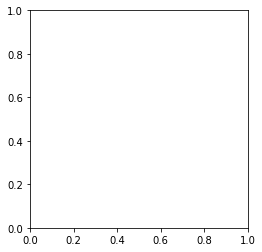

In [17]:
distance_cost_grid(distance)

In [18]:
np.array(x_train)

array([[2.14009950e-02, 5.98579000e-02, 6.96497590e-01, ...,
        6.24415967e+01, 7.27772442e-01, 7.27772442e-01],
       [1.57046055e-01, 4.67667184e-01, 9.84250144e-01, ...,
        4.57180088e+01, 7.29494383e-01, 7.29494383e-01],
       [1.71323955e-01, 1.67300549e-01, 1.40920440e+00, ...,
        4.44866291e+01, 5.98878356e-01, 5.98878356e-01],
       ...,
       [6.49464230e-02, 1.30836992e-01, 2.75236940e-01, ...,
        1.46716716e+01, 6.07373925e-01, 6.07373925e-01],
       [8.94457420e-02, 6.78925200e-02, 4.38907103e-01, ...,
        2.36233059e+01, 6.04955670e-01, 6.04955670e-01],
       [1.81017378e-01, 1.88122721e-01, 1.01189888e+00, ...,
        5.14200844e+01, 6.50080402e-01, 6.50080402e-01]])

In [19]:
#test with small data set 
X = np.random.random((100,10))
y = np.random.randint(0,2, (100))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [440]:
#Using Dynamic time warp as custom metric 
def DTW(x,y):   
    i = x.size
    j = y.size
    #compute distance matrix using library 
    distance_mat = distance.cdist(x.reshape(-1,1),y.reshape(-1,1))
    #initialize cumulative distance array with inf and start point (0,0)
    cumdist = np.matrix(np.ones((i+1,j+1)) * np.inf)
    cumdist[0,0] = 0 #start point 

    for i in range(i):
        for j in range(j):
            minimum_cost = np.min([cumdist[i, j+1],
                                   cumdist[i+1, j],
                                   cumdist[i, j]])
            cumdist[i+1, j+1] = distance_mat[i,j] + minimum_cost

    return cumdist[i, j]  

#Train using knn library 
parameters = {'n_neighbors':[4]} #using one 
clf = GridSearchCV(KNeighborsClassifier(metric=DTW), parameters, verbose=2)
clf.fit(x_train, y_train[:,1])


#evaluate
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\rji284\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_neighbors=4 ...................................................
[CV] .................................. n_neighbors=4, total=2473.5min
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 2473.5min remaining:    0.0s


[CV] .................................... n_neighbors=4, total=27.0min
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=25.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 2526.2min finished


KeyboardInterrupt: 

In [ ]:
print("hi")

In [ ]:
""""#Use DTW with in-built knn from library 
#accumulated cost for taking all paths: we want to find the min path in the cost matrix 
#start from (0,0)
def Dynamic_time_warp(x):
#input is the two time series data => train and test 
#output is the minimum paths 

#compute the distance matrix using the euclidean distance between points 
    for i in range(len(x)):
        for j in range(len(x)):
            distance[i,j] =  (x[j] - x[i])**2
        
        
    cost_mat = np.zeros((len(x), len(x))) #initialize cost matrix 

    #Starting point 
    cost_mat[0,0] =  distance[0,0] 

    #moving along the first row form (0,0)
    for i in range(1, len(x)):
        cost_mat[0,i] =  distance[0,i] +cost_mat[0,i-1]

    #moving from (0,0) upwards 
    for i in range(1,len(x)):
        cost_mat[i,0] = distance[i,0] + cost_mat[i-1, 0]
    
    #compute minimum 
    for i in range(1,len(x)):
        for i in range(1,len(x)):
            cost_mat[i,j] = distance[i,j] + min(cost_mat[i-1, j-1], cost_mat[i-1, j], cost_mat[i, j-1])
        
    return cost_mat[i,j]"""
